# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - jason example https://json.org/example.html 
        # city_weather = "eafb9b9ea650033b261ec05dc177eb9"
        
        # Send the API request
        city_weather = requests.get(city_url).json()
        # response.raise_for_status()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=bakchar&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 1 of Set 1 | bakchar
https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 2 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?q=badger&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 3 of Set 1 | badger
https://api.openweathermap.org/data/2.5/weather?q=waitangi&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 4 of Set 1 | waitangi
https://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 5 of Set 1 | adamstown
https://api.openweathermap.org/data/2.5/weather?q=saipan&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 6 of Set 1 | saipan
https://api.openweathermap.org/data/2.5/weather?q=rustam&appid=7eafb9b9ea650033b261ec05dc177eb9
Proces

https://api.openweathermap.org/data/2.5/weather?q=invercargill&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 7 of Set 2 | invercargill
https://api.openweathermap.org/data/2.5/weather?q=viedma&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 8 of Set 2 | viedma
https://api.openweathermap.org/data/2.5/weather?q=dakhla&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 9 of Set 2 | dakhla
https://api.openweathermap.org/data/2.5/weather?q=vorgashor&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 10 of Set 2 | vorgashor
https://api.openweathermap.org/data/2.5/weather?q=bethel&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 11 of Set 2 | bethel
https://api.openweathermap.org/data/2.5/weather?q=talnakh&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 12 of Set 2 | talnakh
https://api.openweathermap.org/data/2.5/weather?q=vadso&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 13 of Set 2 | vadso
https://api.openweathermap.org/data/2.5/

https://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 15 of Set 3 | yellowknife
https://api.openweathermap.org/data/2.5/weather?q=abilene&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 16 of Set 3 | abilene
https://api.openweathermap.org/data/2.5/weather?q=fortuna&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 17 of Set 3 | fortuna
https://api.openweathermap.org/data/2.5/weather?q=swakopmund&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 18 of Set 3 | swakopmund
https://api.openweathermap.org/data/2.5/weather?q=longyearbyen&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 19 of Set 3 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?q=bardsir&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 20 of Set 3 | bardsir
https://api.openweathermap.org/data/2.5/weather?q=yeppoon&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 21 of Set 3 | yeppoon
https://api.openw

https://api.openweathermap.org/data/2.5/weather?q=cavalaire-sur-mer&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 22 of Set 4 | cavalaire-sur-mer
https://api.openweathermap.org/data/2.5/weather?q=alice springs&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 23 of Set 4 | alice springs
https://api.openweathermap.org/data/2.5/weather?q=nogliki&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 24 of Set 4 | nogliki
https://api.openweathermap.org/data/2.5/weather?q=escanaba&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 25 of Set 4 | escanaba
https://api.openweathermap.org/data/2.5/weather?q=college&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 26 of Set 4 | college
https://api.openweathermap.org/data/2.5/weather?q=kargasok&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 27 of Set 4 | kargasok
https://api.openweathermap.org/data/2.5/weather?q=tolanaro&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 28 of Set 4 | tolanaro
htt

https://api.openweathermap.org/data/2.5/weather?q=upington&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 31 of Set 5 | upington
https://api.openweathermap.org/data/2.5/weather?q=tucupita&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 32 of Set 5 | tucupita
https://api.openweathermap.org/data/2.5/weather?q=fernley&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 33 of Set 5 | fernley
https://api.openweathermap.org/data/2.5/weather?q=pisco&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 34 of Set 5 | pisco
https://api.openweathermap.org/data/2.5/weather?q=naze&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 35 of Set 5 | naze
https://api.openweathermap.org/data/2.5/weather?q=kajaani&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 36 of Set 5 | kajaani
https://api.openweathermap.org/data/2.5/weather?q=newman&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 37 of Set 5 | newman
https://api.openweathermap.org/data/2.5/weather?q

https://api.openweathermap.org/data/2.5/weather?q=springbok&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 40 of Set 6 | springbok
https://api.openweathermap.org/data/2.5/weather?q=susuman&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 41 of Set 6 | susuman
https://api.openweathermap.org/data/2.5/weather?q=taibet&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 42 of Set 6 | taibet
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=montecristo&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 43 of Set 6 | montecristo
https://api.openweathermap.org/data/2.5/weather?q=fortaleza&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 44 of Set 6 | fortaleza
https://api.openweathermap.org/data/2.5/weather?q=ahau&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 45 of Set 6 | ahau
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=acarau&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 

https://api.openweathermap.org/data/2.5/weather?q=ta`u&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 0 of Set 8 | ta`u
https://api.openweathermap.org/data/2.5/weather?q=val-d'or&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 1 of Set 8 | val-d'or
https://api.openweathermap.org/data/2.5/weather?q=machico&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 2 of Set 8 | machico
https://api.openweathermap.org/data/2.5/weather?q=savelugu&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 3 of Set 8 | savelugu
https://api.openweathermap.org/data/2.5/weather?q=camacupa&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 4 of Set 8 | camacupa
https://api.openweathermap.org/data/2.5/weather?q=rongelap&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 5 of Set 8 | rongelap
https://api.openweathermap.org/data/2.5/weather?q=mahanoro&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 6 of Set 8 | mahanoro
https://api.openweathermap.org/data/2.5/weat

https://api.openweathermap.org/data/2.5/weather?q=davos&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 9 of Set 9 | davos
https://api.openweathermap.org/data/2.5/weather?q=smach mean chey&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 10 of Set 9 | smach mean chey
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=madimba&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 11 of Set 9 | madimba
https://api.openweathermap.org/data/2.5/weather?q=nizhnesortymskiy&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 12 of Set 9 | nizhnesortymskiy
https://api.openweathermap.org/data/2.5/weather?q=maragogi&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 13 of Set 9 | maragogi
https://api.openweathermap.org/data/2.5/weather?q=namibe&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 14 of Set 9 | namibe
https://api.openweathermap.org/data/2.5/weather?q=charlottetown&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 

https://api.openweathermap.org/data/2.5/weather?q=belle fourche&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 19 of Set 10 | belle fourche
https://api.openweathermap.org/data/2.5/weather?q=guajara&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 20 of Set 10 | guajara
https://api.openweathermap.org/data/2.5/weather?q=al qubbah&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 21 of Set 10 | al qubbah
https://api.openweathermap.org/data/2.5/weather?q=mount pearl&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 22 of Set 10 | mount pearl
https://api.openweathermap.org/data/2.5/weather?q=tannum sands&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 23 of Set 10 | tannum sands
https://api.openweathermap.org/data/2.5/weather?q=wapato&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 24 of Set 10 | wapato
https://api.openweathermap.org/data/2.5/weather?q=seven pagodas&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 25 of Set 10 | seve

https://api.openweathermap.org/data/2.5/weather?q=sayansk&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 28 of Set 11 | sayansk
https://api.openweathermap.org/data/2.5/weather?q=erdek&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 29 of Set 11 | erdek
https://api.openweathermap.org/data/2.5/weather?q=bou tlelis&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 30 of Set 11 | bou tlelis
https://api.openweathermap.org/data/2.5/weather?q=enid&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 31 of Set 11 | enid
https://api.openweathermap.org/data/2.5/weather?q=albu kamal&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 32 of Set 11 | albu kamal
https://api.openweathermap.org/data/2.5/weather?q=sundarnagar&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 33 of Set 11 | sundarnagar
https://api.openweathermap.org/data/2.5/weather?q=korla&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 34 of Set 11 | korla
https://api.openweathermap.o

https://api.openweathermap.org/data/2.5/weather?q=naxos&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 36 of Set 12 | naxos
https://api.openweathermap.org/data/2.5/weather?q=salekhard&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 37 of Set 12 | salekhard
https://api.openweathermap.org/data/2.5/weather?q=villa ojo de agua&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 38 of Set 12 | villa ojo de agua
https://api.openweathermap.org/data/2.5/weather?q=neiafu&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 39 of Set 12 | neiafu
https://api.openweathermap.org/data/2.5/weather?q=kirovskaya&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 40 of Set 12 | kirovskaya
https://api.openweathermap.org/data/2.5/weather?q=kushiro&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 41 of Set 12 | kushiro
https://api.openweathermap.org/data/2.5/weather?q=anloga&appid=7eafb9b9ea650033b261ec05dc177eb9
Processing Record 42 of Set 12 | anloga
https://api.

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bakchar,57.0186,82.0711,286.54,96,50,0.87,RU,1690496070
1,port-aux-francais,-49.3500,70.2167,278.39,87,87,11.92,TF,1690496070
2,badger,64.8000,-147.5333,299.33,52,75,4.63,US,1690496027
3,waitangi,-43.9535,-176.5597,282.49,83,34,3.13,NZ,1690496071
4,adamstown,-25.0660,-130.1015,292.44,59,26,1.42,PN,1690496071


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

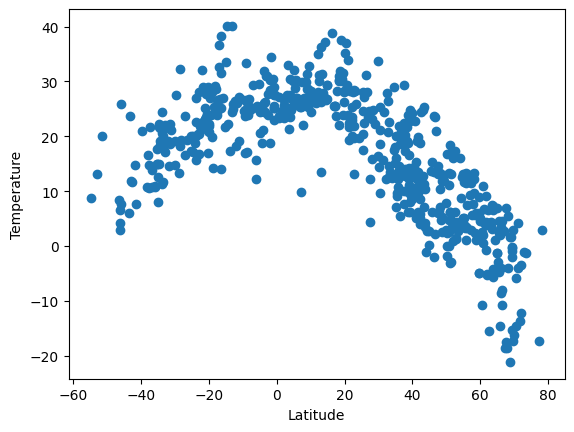

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
#plt.title("scatter plot for latitude vs temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

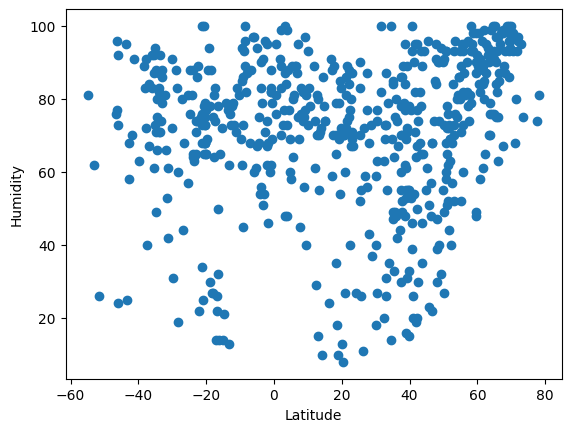

In [24]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
# Y
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#plt.title("scatter plots for latitude vs. humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

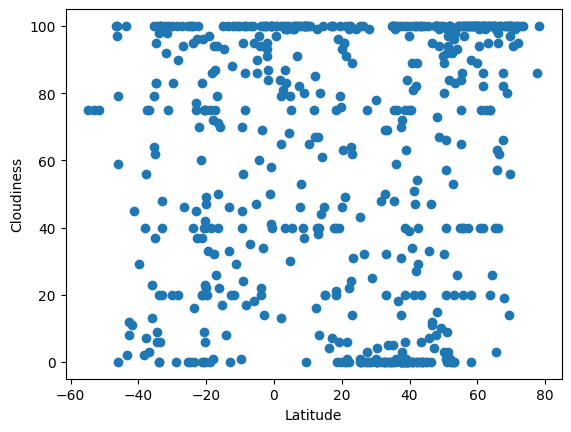

In [25]:
# Build the scatter plots for latitude vs. cloudiness (2022-10-18)
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#plt.title("scatter plots for latitude vs. cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

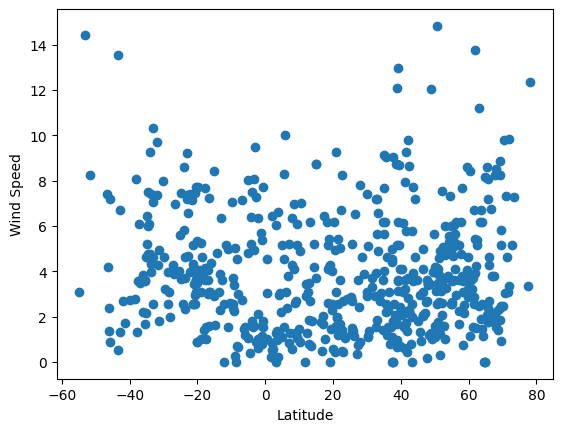

In [26]:
# Build the scatter plots for latitude vs. wind speed (2022-10-18)
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#plt.title("scatter plots for latitude vs. wind speed)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
# Perform a linear regression on temperature vs. latitude
def linear_reg(x_values, y_values, condition, coordinate):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
   

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(condition)
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434125


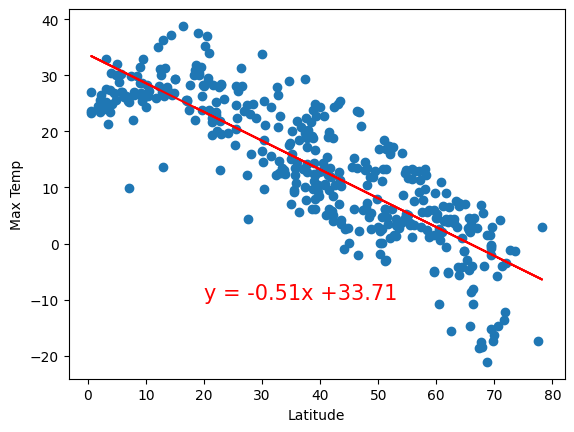

In [49]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],'Max Temp', (20,-10))

The r-value is: 0.4121057168607252


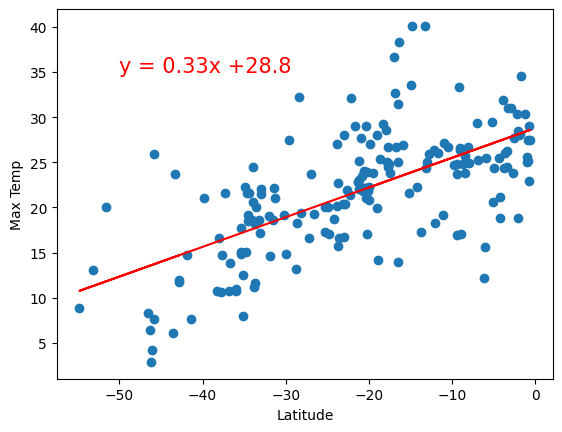

In [36]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],'Max Temp', (-50,35))

**Discussion about the linear relationship:**

Relationship between Temperature and Latitude:

There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of 0.7161472181434125 on Northern Hemisphere.

There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.41210571686072523 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789608


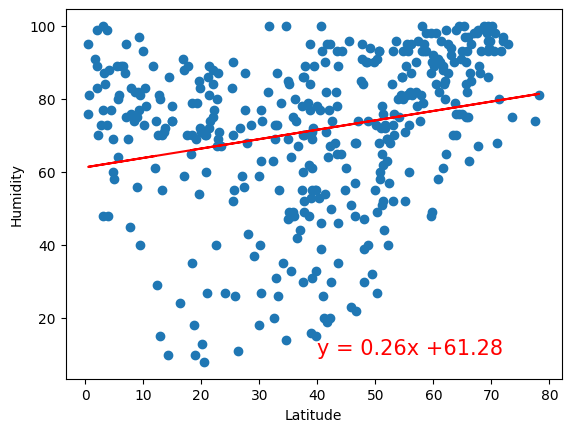

In [38]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df['Humidity'],'Humidity', (40,10))

The r-value is: 0.0002808747046324618


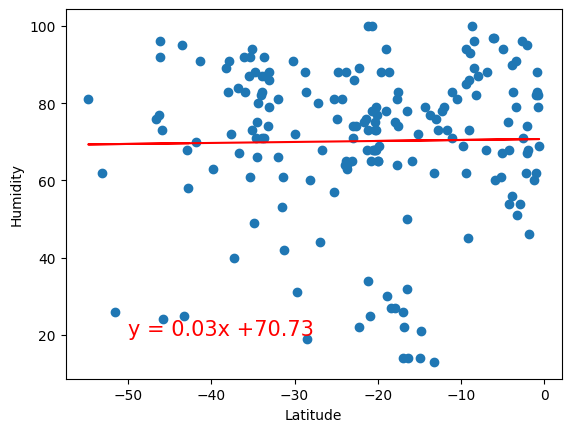

In [47]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df['Humidity'],'Humidity', (-50,20))

**Discussion about the linear relationship:** 

Relationship between Humidity and Latitude:

There is a relatively strong positive correlation between humidity and latitude with a correlation coefficient of 0.05689741545789608 on Northern Hemisphere.

There is a relatively strong positive correlation correlation between humidity and latitude with a correlation coefficient of 0.0002808747046324618 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811043


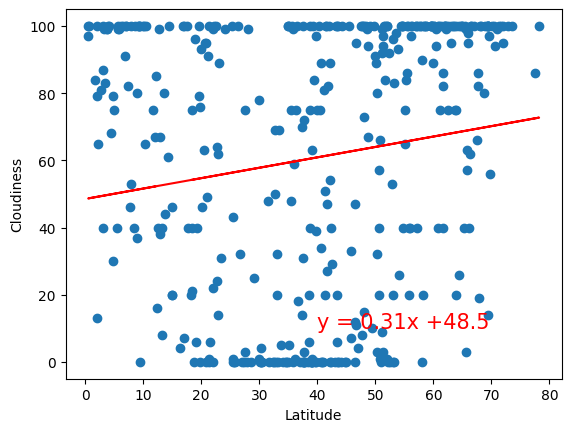

In [41]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df['Cloudiness'],'Cloudiness', (40,10))

The r-value is: 0.020567354299943663


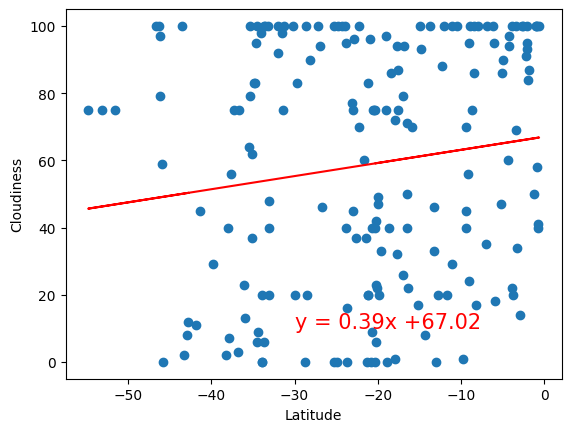

In [45]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df['Cloudiness'],'Cloudiness', (-30,10))

**Discussion about the linear relationship:** 

Relationship between Cloudiness and Latitude:

There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.024026517125811043 on Northern Hemisphere.

There is a relatively strong positive correlation between cloudiness and latitude with a correlation coefficient of 0.020567354299943663 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449474


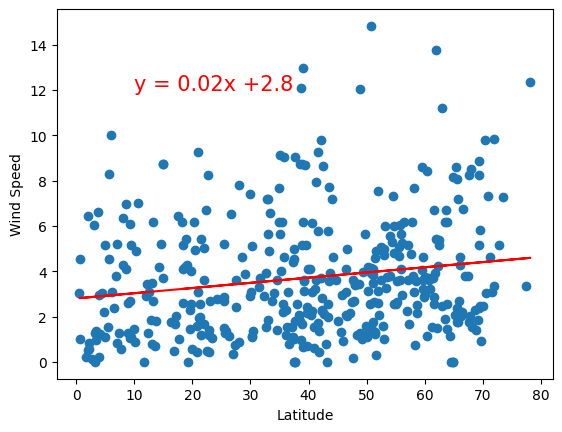

In [44]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df['Wind Speed'],'Wind Speed', (10,12))

The r-value is: 0.06223904070051575


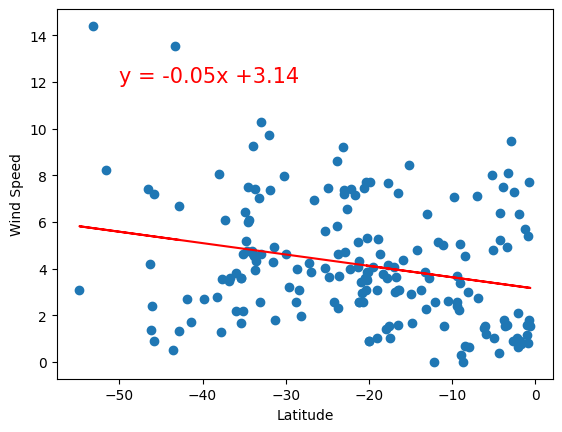

In [46]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'].rename("Latitude"), southern_hemi_df['Wind Speed'],'Wind Speed', (-50,12))

**Discussion about the linear relationship:**

Relationship between Wind Speed and Latitude:

There is a negligible to almost no correlation between wind speed and latitude with a correlation coefficient of 0.030396762354449474on Northern Hemisphere.

There is a weak negative correlation between wind speed and latitude with a correlation coefficient of 0.06223904070051575 on Southern Hemisphere.